In [1]:
from CascadingFailure import CascadingFailureSimulation
import networkx as nx 
import matplotlib.pyplot as plt 
import random 
import numpy as np 
import logging
import utilities as utils
import os
import plotting as plot

In [2]:
if os.path.exists('logfile.log'):
    os.remove('logfile.log')

logging.basicConfig(filename='logfile.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info("Starting the network graph import.")

In [3]:
graph = utils.get_networkgraph("data/iceland.graphml")

In [4]:
ER_graph = utils.create_ER_network(graph)

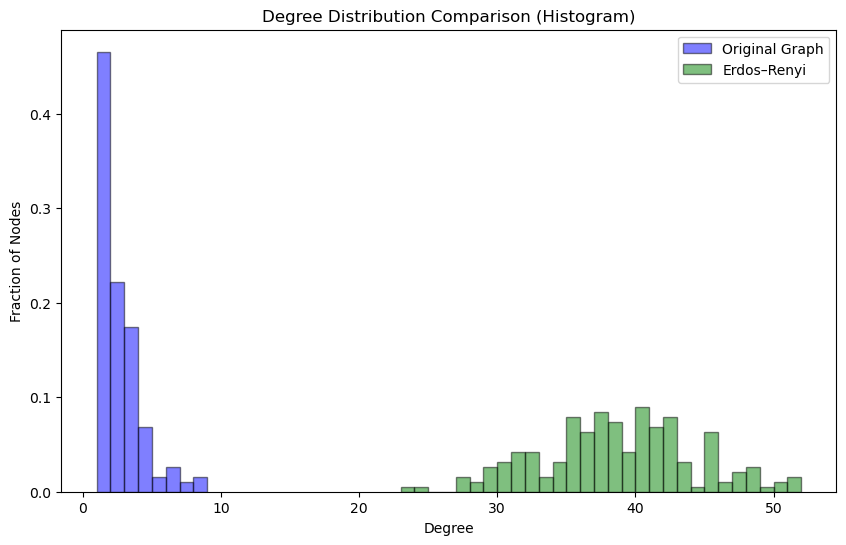

KS test result between G and ER: statistic=0.375, p-value=0.26514589251617315


In [5]:
utils.compare_degree_distributions(graph, ER_graph, prob_dist= False)

In [6]:
utils.compare_graph_metrics(graph, ER_graph)

Clustering Coefficient - Network1: 0.00159, Network2: 0.20305
Average Path Length - Network1: 9.06287, Network2: 1.7971968929415738
Degree Assortativity - Network1: -0.23604, Network2: -0.00302


In [7]:
BA_graph = utils.create_BA_network(graph, m=3)
WS_graph = utils.create_WS_network(graph)

In [8]:
utils.compare_graph_metrics(graph,BA_graph)
utils.compare_graph_metrics(graph,WS_graph)

Clustering Coefficient - Network1: 0.00159, Network2: 0.09629
Average Path Length - Network1: 9.06287, Network2: 2.8506135314645955
Degree Assortativity - Network1: -0.23604, Network2: -0.11433
Clustering Coefficient - Network1: 0.00159, Network2: 0.01587
Average Path Length - Network1: 9.06287, Network2: None
Degree Assortativity - Network1: -0.23604, Network2: -0.00124


### Cascading Failure in Iceland Powergrid 

In [9]:
alpha = np.linspace(0,1.2,10)
centrality_types = ["degree", "betweenness", "closeness"]
results_ice = utils.simulate_and_average(graph, alpha, centrality_types)
print(f"The result for the iceland network is: {results_ice}")

The result for the iceland network is: {'degree': array([1.        , 0.96021164, 0.58328042, 0.14412698, 0.01312169,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101]), 'betweenness': array([0.28042328, 0.25925926, 0.23343915, 0.14645503, 0.00783069,
       0.00529101, 0.00529101, 0.00529101, 0.00529101, 0.00529101]), 'closeness': array([1.        , 1.        , 0.22497354, 0.05312169, 0.01460317,
       0.00783069, 0.00783069, 0.00529101, 0.00529101, 0.00529101])}


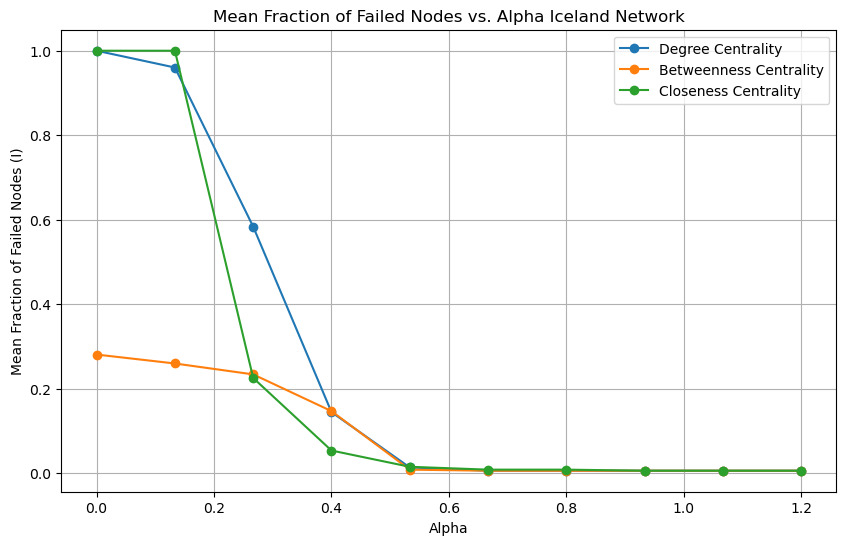

Results saved to results/Icelandresults.csv


<Figure size 640x480 with 0 Axes>

In [10]:
plot.plot_fraction_failed_nodes(alpha, results_ice,  network_name = 'Iceland', save_plot= False,save_results= False)